Pinecone package not available.


=== Qook Grocery Chatbot - Workflow Visualizer ===
conditional_edges로 변환된 LangGraph 워크플로우를 시각화합니다.

워크플로우 그래프를 생성하는 중...
워크플로우를 시각화하는 중...


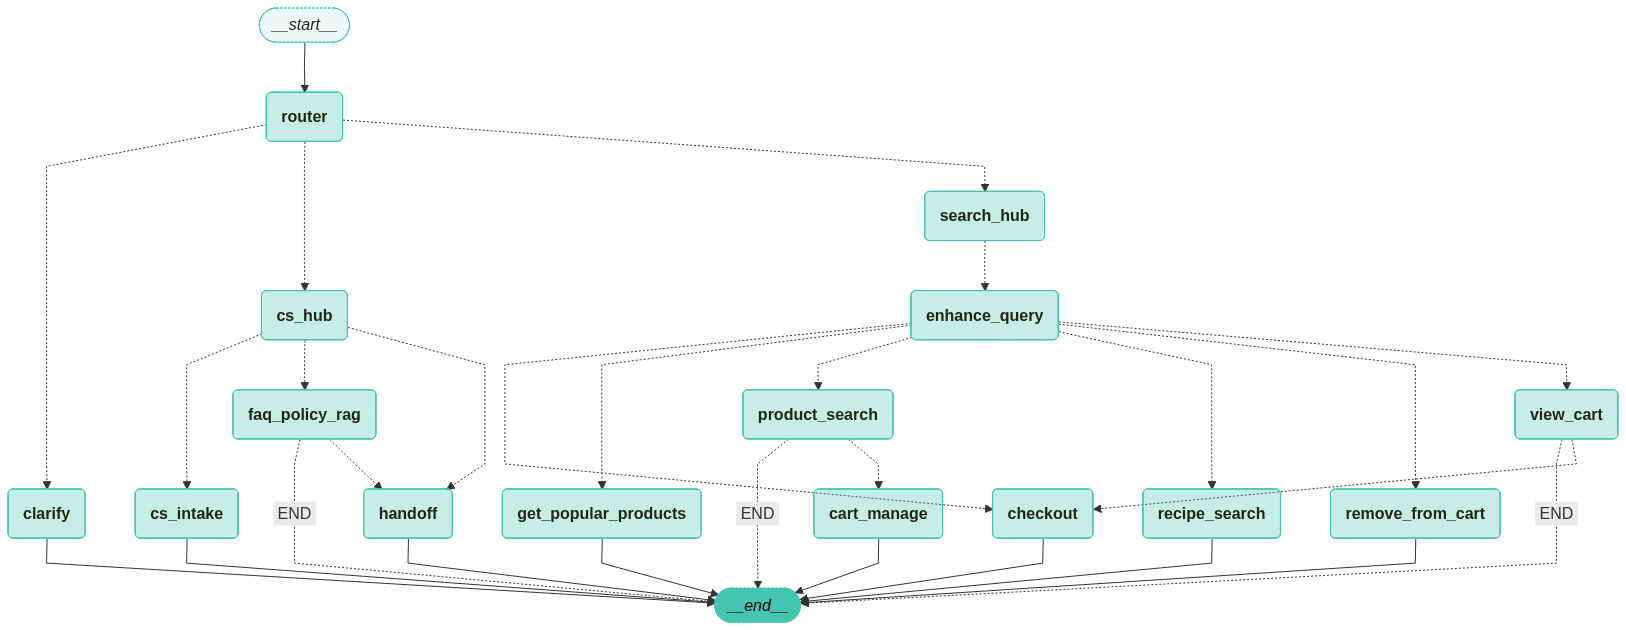

✓ 워크플로우 다이어그램이 생성되었습니다: workflow_diagram_20250909_113829.png

=== 워크플로우 구조 요약 ===
• START → router
• router → [clarify|search_hub|cs_hub]
• search_hub → enhance_query (conditional_edges)
• enhance_query → [product_search|recipe_search|view_cart|remove_from_cart|get_popular_products]
• product_search → [cart_manage|END] (cart_add인 경우)
• view_cart → [checkout|END] (checkout이고 장바구니에 아이템이 있는 경우)
• cs_hub → [cs_intake|handoff] (conditional_edges)
• cs_intake → faq_policy_rag
• faq_policy_rag → [handoff|END] (should_handoff 조건)
• 모든 끝단 → END

이미지 파일: /home/ubuntu/grocery_chatbot_v2/workflow_diagram_20250909_113829.png
시각화가 완료되었습니다!


In [2]:
#!/usr/bin/env python3
"""
워크플로우 시각화 스크립트
conditional_edges로 변환된 LangGraph 워크플로우를 시각화합니다.
"""

import os
import sys
from datetime import datetime

# 현재 디렉토리를 Python path에 추가
# sys.path.append(os.path.dirname(os.path.abspath(__file__)))

try:
    from langchain_teddynote.graphs import visualize_graph
    from workflow import get_workflow_graph
    
    def visualize_current_workflow():
        """현재 워크플로우를 시각화하고 이미지로 저장"""
        try:
            print("워크플로우 그래프를 생성하는 중...")
            
            # 워크플로우 그래프 가져오기
            workflow_graph = get_workflow_graph()
            
            print("워크플로우를 시각화하는 중...")
            
            # 현재 시간으로 파일명 생성
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"workflow_diagram_{timestamp}.png"
            
            # 워크플로우 시각화
            visualize_graph(
                workflow_graph
            )
            
            print(f"✓ 워크플로우 다이어그램이 생성되었습니다: {filename}")
            print("\n=== 워크플로우 구조 요약 ===")
            print("• START → router")
            print("• router → [clarify|search_hub|cs_hub]")
            print("• search_hub → enhance_query (conditional_edges)")
            print("• enhance_query → [product_search|recipe_search|view_cart|remove_from_cart|get_popular_products]")
            print("• product_search → [cart_manage|END] (cart_add인 경우)")
            print("• view_cart → [checkout|END] (checkout이고 장바구니에 아이템이 있는 경우)")
            print("• cs_hub → [cs_intake|handoff] (conditional_edges)")
            print("• cs_intake → faq_policy_rag")
            print("• faq_policy_rag → [handoff|END] (should_handoff 조건)")
            print("• 모든 끝단 → END")
            
            return filename
            
        except ImportError as e:
            print(f"⚠ langchain_teddynote 모듈을 찾을 수 없습니다: {e}")
            print("다음 명령어로 설치해주세요:")
            print("pip install langchain-teddynote")
            return None
            
        except Exception as e:
            print(f"✗ 워크플로우 시각화 중 오류 발생: {e}")
            import traceback
            traceback.print_exc()
            return None
    
    if __name__ == "__main__":
        print("=== Qook Grocery Chatbot - Workflow Visualizer ===")
        print("conditional_edges로 변환된 LangGraph 워크플로우를 시각화합니다.\n")
        
        filename = visualize_current_workflow()
        
        if filename:
            print(f"\n이미지 파일: {os.path.abspath(filename)}")
            print("시각화가 완료되었습니다!")
        else:
            print("시각화에 실패했습니다.")

except ImportError as e:
    print(f"⚠ 필수 모듈을 가져올 수 없습니다: {e}")
    print("\n필요한 패키지:")
    print("• pip install langchain-teddynote")
    print("• workflow.py 파일이 동일한 디렉토리에 있는지 확인하세요")